In [69]:
import pandas as pd
import numpy as np
import os
import re
import mystyle.sty as sty
import matplotlib.pyplot as plt

In [70]:
sty.reset_plots()

In [71]:
files_all = os.listdir()
files_out = []
for file in files_all:
    if file[:6] == 'output':
        files_out.append(file)

In [73]:
d_all = pd.DataFrame(columns=['t', 'rep', 'ws', 'ms', 'wf', 'mf', 'h', 'n', 'pb'], dtype=float)
for i, file in enumerate(files_out):
    if i %100 == 0:
        print(i)
    param_block = int(re.search("^output_0_(.*\w).txt$", file).groups()[0])
    d = pd.read_csv(file, skiprows=10, delimiter=',')
    d['pb'] = param_block
    d_all = pd.concat((d_all, d))
    if i == 99:
        break

0


In [74]:
d_all.shape

(760000, 9)

In [75]:
d_all['fs'] = (d_all['ws']+d_all['ms'])/d_all['n']

In [76]:
g = d_all[['t','h','n','fs']].groupby('t')

In [77]:
# means = g.mean()
# variances = g.var(ddof=1)

# fig, ax = plt.subplots(1,1)
# ax.plot(means.index, means.h)

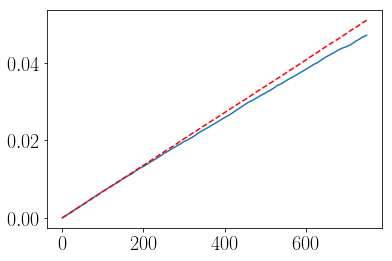

In [87]:
means = g.mean()
variances = g.var(ddof=1)

fig, ax = plt.subplots(1,1)
ax.plot(variances.index, variances.h)

ax.plot(var_th.index, var_th.values, '--r')

In [86]:
var_th = means.index * means.h*(1. - means.h)*means.fs*2.0*3.4657359028e-01/means.n